In [6]:
import re
import ast
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from pathlib import Path
from functional import seq
from loguru import logger
from joblib import Parallel, delayed

In [7]:
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

config = {
            "font.family": "serif",
            "font.size": 12,
            "mathtext.fontset": "stix",# matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ["STZhongsong"],# 华文中宋
            "axes.unicode_minus": False # 处理负号，即-号
         }
rcParams.update(config)


In [8]:
preprocessed_df = pd.read_csv("./cache/preprocessed_data_set.csv", header=0)

C:\Users\HP\AppData\Local\Temp\ipykernel_19872\2088352560.py:1: DtypeWarning: Columns (122,137,155,158,197,230,299,563,566) have mixed types. Specify dtype option on import or set low_memory=False.
  preprocessed_df = pd.read_csv("./cache/preprocessed_data_set.csv", header=0)


正负样本数：
 0    9796
1    4252
Name: label, dtype: int64


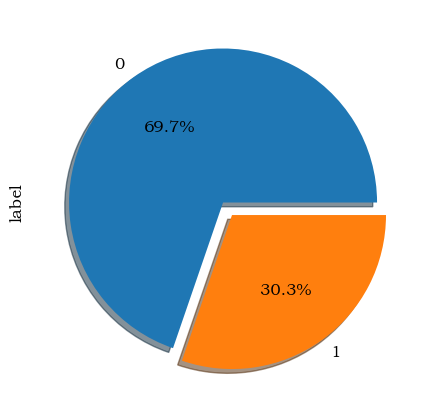

In [9]:
label_gp = preprocessed_df.label.value_counts()
print('正负样本数：\n',label_gp)
_,ax = plt.subplots(1,1,figsize=(5,5))
preprocessed_df.label.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],ax=ax)
plt.show()

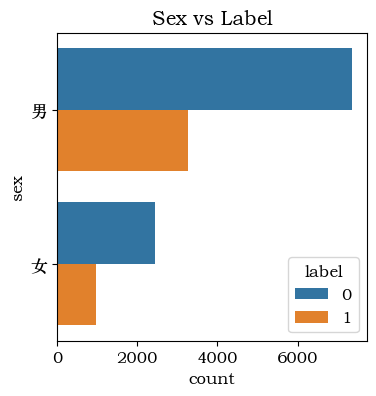

In [10]:
plt.figure(figsize=(4,4))
plt.title("Sex vs Label")
ax = sns.countplot(y="sex",hue="label",data=preprocessed_df[["sex", "label"]])
for p in ax.patches:
    height = p.get_height()

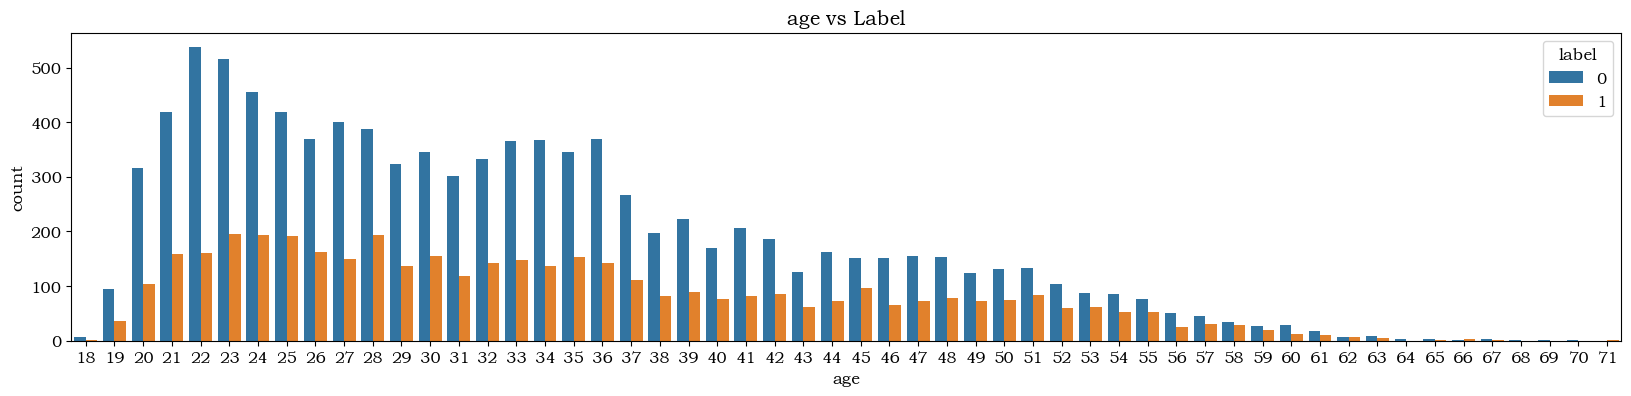

In [11]:
plt.figure(figsize=(20,4))
plt.title("age vs Label")
ax = sns.countplot(x="age",hue="label",data=preprocessed_df[["age", "label"]])
for p in ax.patches:
    height = p.get_height()

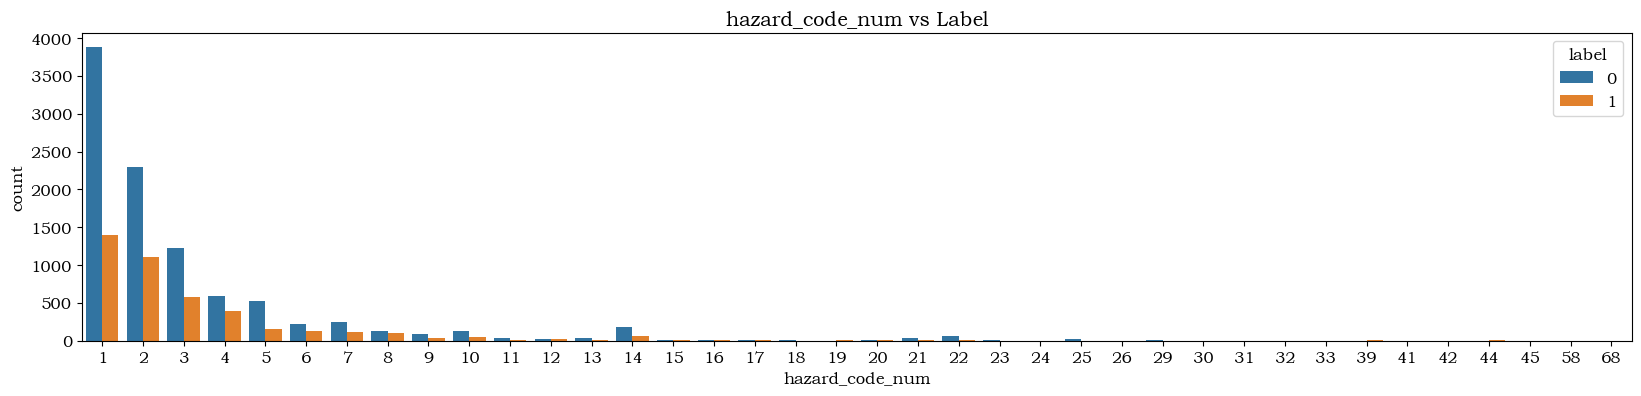

In [14]:
plt.figure(figsize=(20,4))
plt.title("hazard_code_num vs Label")
ax = sns.countplot(x="hazard_code_num",hue="label",data=preprocessed_df[["hazard_code_num", "label"]])
for p in ax.patches:
    height = p.get_height()

In [36]:
preprocessed_df.columns[150:]

Index(['CrystallineLens_range', 'CrystallineLens_is_abnormal',
       'ColorDiscrimination_result', 'ColorDiscrimination_range',
       'ColorDiscrimination_is_abnormal', 'VisualAcuityLeft_result',
       'VisualAcuityLeft_range', 'VisualAcuityLeft_is_abnormal',
       'VisualAcuityRight_result', 'VisualAcuityRight_range',
       ...
       'hazard_code_0', 'hazard_code_1', 'hazard_code_2', 'hazard_code_3',
       'hazard_code_4', 'hazard_code_5', 'hazard_code_6', 'hazard_code_7',
       'hazard_code_8', 'hazard_code_9'],
      dtype='object', length=547)